<center><h1>Unsupervised Learning</h1></center><br/>
Unsupervised learning is a machine learning technique in which models are not supervised using training dataset. Instead, models itself find the hidden patterns and insights from the given data. It can be compared to learning which takes place in the human brain while learning new things.<br/><br/>
<b>Types of Unsupervised Learning:</b>

1. <b>Clustering:</b> Clustering is a method of grouping the objects into clusters such that objects with most similarities remains into a group and has less or no similarities with the objects of another group.
2. <b>Association:</b>  An association rule is an unsupervised learning method which is used for finding the relationships between variables in the large database.

<b>Dataset Link: </b>https://github.com/BejaminNaibei/dataset/blob/main/Market_Basket_Optimisation.csv

## Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings("ignore")

In [2]:
X, y = make_blobs(n_samples = 300, cluster_std = 1.00, random_state = 12)

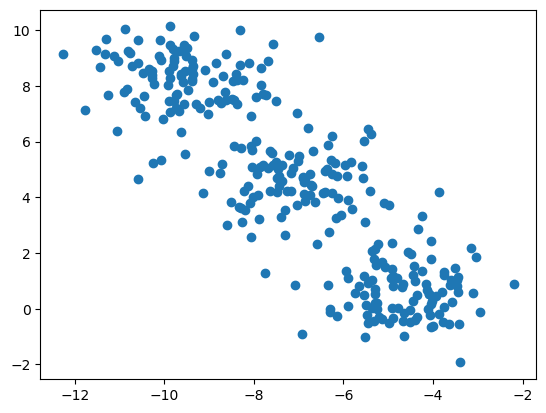

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

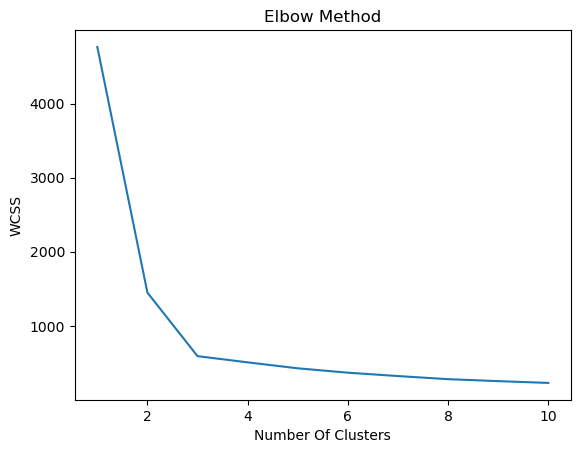

In [5]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

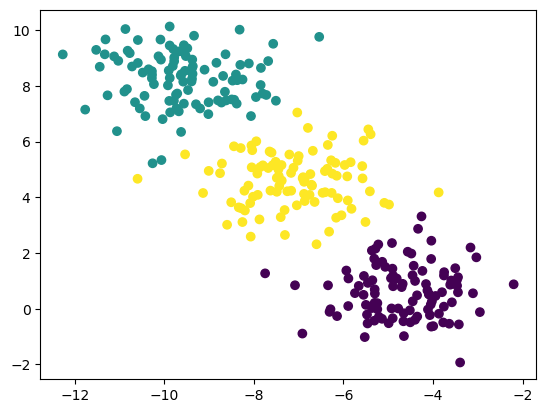

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()

## Apriori Algorithm

In [8]:
# !pip install apyori

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
data = pd.read_csv('store_data.csv', header = None)

In [11]:
# Intializing the list
transacts = []
# populating a list of transactions
for i in range(0, 7501): 
    transacts.append([str(data.values[i,j]) for j in range(0, 20)])

In [12]:
transacts[:2]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan']]

In [13]:
!pip install apyori

Defaulting to user installation because normal site-packages is not writeable


In [14]:
from apyori import apriori
rule = apriori(transactions = transacts, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [15]:
output = list(rule) # returns a non-tabular output
for item in output:
    pair = item[0]
    items = [x for x in pair]
    print(f"Rule: {items[0]} -> {items[1]}")
    print(f"Support: {item[1]}") # Individual Popularity of Item (item/total_transactions)
    print(f"Confidence: {item[2][0][2]}") # Item A will induce more profit for Item B ((Item A + Item B) / Item A)
    print(f"Lift: {item[2][0][3]}") # How much Item A induces profit to Item B (Confidence / Support)
    print("=="*50)

Rule: light cream -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: mushroom cream sauce -> escalope
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: pasta -> escalope
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: honey -> fromage blanc
Support: 0.003332888948140248
Confidence: 0.2450980392156863
Lift: 5.164270764485569
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: light cream -> olive oil
Support: 0.003199573390214638
Confidence: 0.20512820512820515
Lift: 3.1147098515519573
Rule: olive oil -> whole wheat pasta
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confide